In [2]:
#import zipfile
#with zipfile.ZipFile("archive (24).zip","r") as zip_ref:
#    zip_ref.extractall("fire")

<B>IMPORTING ALL THE REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Adithya\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os 
import os.path
from pathlib import Path
import glob

In [4]:
import tensorflow 
from PIL import Image
from keras. preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [5]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxscaler 
#from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split 
from keras import regularizers 
from sklearn.preprocessing import LabelEncoder


In [6]:
from keras.optimizers import RMSprop,Adam,Optimizer

In [7]:
import keras
from tensorflow.keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPoo12D, BatchNormalization,MaxPooling2D,BatchNormalization, \
#Permute, TimeDistributed, Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models 
from keras import layers 
import tensorflow as tf
from keras. applications import VGG16, VGG19, inception_v3
from keras import backend as K 
from keras.utils import plot_model

In [8]:
from warnings import filterwarnings
filterwarnings ("ignore", category=DeprecationWarning) 
filterwarnings ("ignore", category=FutureWarning) 
filterwarnings ("ignore", category=UserWarning)

<B>DATA LOADING

In [9]:
path=Path(r"fire/fire_dataset")

In [10]:
PNG_Path = list(path.glob(r"*/*.png"))

In [11]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [12]:
print("FIRE: ", PNG_Labels.count("fire_images"))
print ("NO_FIRE: ", PNG_Labels.count ("non_fire_images"))

FIRE:  755
NO_FIRE:  244


<B>DATA PREPROCESSING

In [13]:
PNG_Path_Series = pd.Series(PNG_Path, name="PNG") .astype(str)
PNG_Labels_Series = pd.Series (PNG_Labels, name="CATEGORY")

In [14]:
print (PNG_Path_Series)

0               fire\fire_dataset\fire_images\fire.1.png
1              fire\fire_dataset\fire_images\fire.10.png
2             fire\fire_dataset\fire_images\fire.100.png
3             fire\fire_dataset\fire_images\fire.101.png
4             fire\fire_dataset\fire_images\fire.102.png
                             ...                        
994    fire\fire_dataset\non_fire_images\non_fire.95.png
995    fire\fire_dataset\non_fire_images\non_fire.96.png
996    fire\fire_dataset\non_fire_images\non_fire.97.png
997    fire\fire_dataset\non_fire_images\non_fire.98.png
998    fire\fire_dataset\non_fire_images\non_fire.99.png
Name: PNG, Length: 999, dtype: object


In [15]:
print (PNG_Path_Series)

0               fire\fire_dataset\fire_images\fire.1.png
1              fire\fire_dataset\fire_images\fire.10.png
2             fire\fire_dataset\fire_images\fire.100.png
3             fire\fire_dataset\fire_images\fire.101.png
4             fire\fire_dataset\fire_images\fire.102.png
                             ...                        
994    fire\fire_dataset\non_fire_images\non_fire.95.png
995    fire\fire_dataset\non_fire_images\non_fire.96.png
996    fire\fire_dataset\non_fire_images\non_fire.97.png
997    fire\fire_dataset\non_fire_images\non_fire.98.png
998    fire\fire_dataset\non_fire_images\non_fire.99.png
Name: PNG, Length: 999, dtype: object


In [16]:
print(PNG_Labels_Series)

0          fire_images
1          fire_images
2          fire_images
3          fire_images
4          fire_images
            ...       
994    non_fire_images
995    non_fire_images
996    non_fire_images
997    non_fire_images
998    non_fire_images
Name: CATEGORY, Length: 999, dtype: object


In [17]:
PNG_Labels_Series.replace({"non_fire_images": "NO_FIRE","fire_images": "FIRE"}, inplace=True)

In [18]:
print(PNG_Labels_Series)

0         FIRE
1         FIRE
2         FIRE
3         FIRE
4         FIRE
        ...   
994    NO_FIRE
995    NO_FIRE
996    NO_FIRE
997    NO_FIRE
998    NO_FIRE
Name: CATEGORY, Length: 999, dtype: object


In [19]:
Main_Train_Data=pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [20]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0             fire\fire_dataset\fire_images\fire.1.png     FIRE
1            fire\fire_dataset\fire_images\fire.10.png     FIRE
2           fire\fire_dataset\fire_images\fire.100.png     FIRE
3           fire\fire_dataset\fire_images\fire.101.png     FIRE
4           fire\fire_dataset\fire_images\fire.102.png     FIRE
..                                                 ...      ...
993  fire\fire_dataset\non_fire_images\non_fire.94.png  NO_FIRE
994  fire\fire_dataset\non_fire_images\non_fire.95.png  NO_FIRE
995  fire\fire_dataset\non_fire_images\non_fire.96.png  NO_FIRE
996  fire\fire_dataset\non_fire_images\non_fire.97.png  NO_FIRE
997  fire\fire_dataset\non_fire_images\non_fire.98.png  NO_FIRE

[998 rows x 2 columns]


In [21]:
print(Main_Train_Data["PNG"][2])
print(Main_Train_Data[ "CATEGORY"][2]) 
print(Main_Train_Data["PNG"][200])
print(Main_Train_Data ["CATEGORY" ][200]) 
print(Main_Train_Data["PNG"][451])

print(Main_Train_Data["CATEGORY"][451])
print(Main_Train_Data["PNG"][852])
print(Main_Train_Data["CATEGORY"][852])

fire\fire_dataset\fire_images\fire.100.png
FIRE
fire\fire_dataset\fire_images\fire.28.png
FIRE
fire\fire_dataset\fire_images\fire.505.png
FIRE
fire\fire_dataset\non_fire_images\non_fire.187.png
NO_FIRE


In [22]:
remove_PNG = (r'/content/fire/fire_dataset/non_fire_images')
Main_Train_Data = Main_Train_Data.loc[~(Main_Train_Data.loc[:, 'PNG'] == remove_PNG),:]

In [23]:
print(Main_Train_Data.loc[Main_Train_Data.loc[:, 'PNG'] == remove_PNG, :])

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [24]:
print (Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0             fire\fire_dataset\fire_images\fire.1.png     FIRE
1            fire\fire_dataset\fire_images\fire.10.png     FIRE
2           fire\fire_dataset\fire_images\fire.100.png     FIRE
3           fire\fire_dataset\fire_images\fire.101.png     FIRE
4           fire\fire_dataset\fire_images\fire.102.png     FIRE
..                                                 ...      ...
993  fire\fire_dataset\non_fire_images\non_fire.94.png  NO_FIRE
994  fire\fire_dataset\non_fire_images\non_fire.95.png  NO_FIRE
995  fire\fire_dataset\non_fire_images\non_fire.96.png  NO_FIRE
996  fire\fire_dataset\non_fire_images\non_fire.97.png  NO_FIRE
997  fire\fire_dataset\non_fire_images\non_fire.98.png  NO_FIRE

[998 rows x 2 columns]


Visualisation

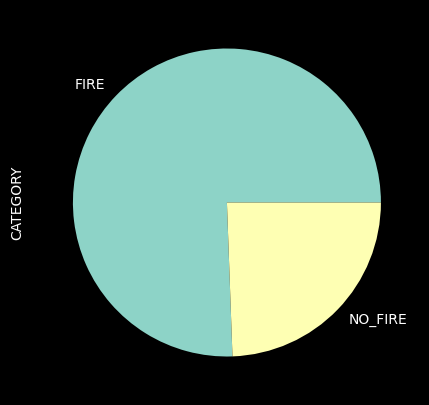

In [171]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

<B>TRAINING THE DATA

In [26]:

Train_Generator = ImageDataGenerator (rescale=1./255,
shear_range=0.3, zoom_range=0.2, brightness_range=[0.2,0.9], rotation_range=30, horizontal_flip=True, vertical_flip=True, fill_mode="nearest", validation_split=0.1)


In [27]:
Test_Generator = ImageDataGenerator (rescale=1./255)

In [28]:
Train_Data, Test_Data = train_test_split(Main_Train_Data, train_size=0.9, random_state=42,shuffle=True)

In [29]:
print ("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE:",Test_Data.shape)

TRAIN SHAPE:  (899, 2)
TEST SHAPE: (100, 2)


In [30]:
Train_Data, Test_Data = train_test_split (Main_Train_Data, train_size=0.9, random_state=42, shuffle=True)

In [31]:
print("TRAIN SHAPE:",Train_Data. shape)
print ("TEST SHAPE:",Test_Data. shape)

TRAIN SHAPE: (899, 2)
TEST SHAPE: (100, 2)


In [32]:
print(Train_Data.head(-1))
print("----")
print(Test_Data.head(-1))

                                                   PNG CATEGORY
599         fire\fire_dataset\fire_images\fire.639.png     FIRE
432         fire\fire_dataset\fire_images\fire.489.png     FIRE
221         fire\fire_dataset\fire_images\fire.299.png     FIRE
973  fire\fire_dataset\non_fire_images\non_fire.76.png  NO_FIRE
525         fire\fire_dataset\fire_images\fire.572.png     FIRE
..                                                 ...      ...
71          fire\fire_dataset\fire_images\fire.163.png     FIRE
106         fire\fire_dataset\fire_images\fire.195.png     FIRE
270         fire\fire_dataset\fire_images\fire.342.png     FIRE
860  fire\fire_dataset\non_fire_images\non_fire.194...  NO_FIRE
435         fire\fire_dataset\fire_images\fire.491.png     FIRE

[898 rows x 2 columns]
----
                                                   PNG CATEGORY
453         fire\fire_dataset\fire_images\fire.507.png     FIRE
793  fire\fire_dataset\non_fire_images\non_fire.133...  NO_FIRE
209        

In [33]:
print(Test_Data["CATEGORY"].value_counts())

FIRE       78
NO_FIRE    22
Name: CATEGORY, dtype: int64


In [34]:
encode=LabelEncoder()

In [35]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])

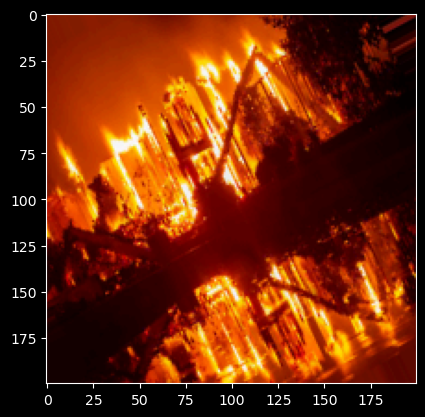

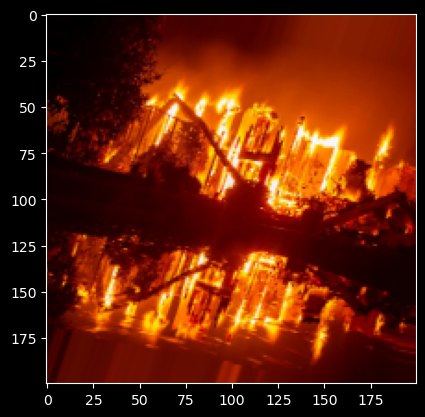

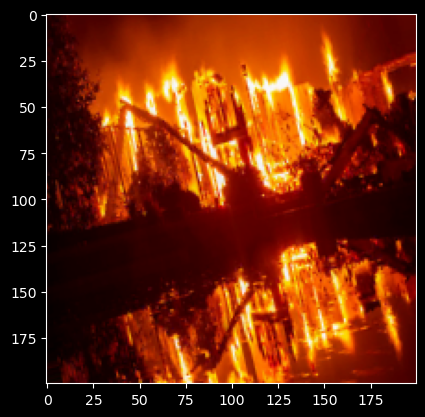

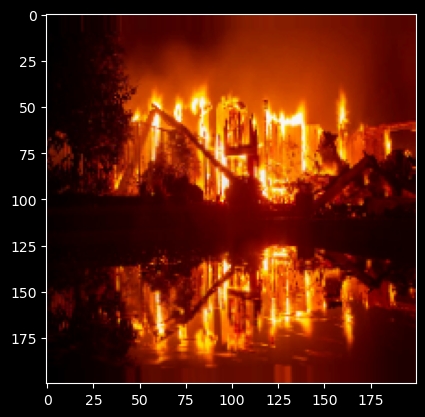

In [36]:
import keras
example_Image = Train_Data["PNG"][99]
Load_Image = keras.utils. load_img(example_Image, target_size=(200, 200))
Array_Image = keras.utils.img_to_array(Load_Image)
Array_Image = Array_Image. reshape((1,) + Array_Image. shape)
i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
  plt.figure(i)
  IMG=plt.imshow(keras.utils .array_to_img(batch[0]))
  i += 1
  if i% 4 == 0:
    break
plt.show() 

<B>SETTING TRAINING DATA

In [37]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
x_col="PNG",
y_col="CATEGORY", color_mode="rgb",
class_mode="categorical", batch_size=32,
subset="training")

Found 810 validated image filenames belonging to 2 classes.


<B>SETTING VALIDATION DATA

In [38]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
x_col="PNG",
y_col="CATEGORY", color_mode="rgb",
class_mode="categorical", batch_size=32, subset="validation")

Found 89 validated image filenames belonging to 2 classes.


<B> SETTING TESTING DATA

In [39]:
Test_IMG_Set = Test_Generator.flow_from_dataframe (dataframe=Test_Data,
x_col="PNG",y_col="CATEGORY",
                                                   
color_mode="rgb",
class_mode="categorical", batch_size=32)

Found 100 validated image filenames belonging to 2 classes.


In [40]:
for data_batch,label_batch in Train_IMG_Set:
  print("DATA SHAPE:",data_batch.shape)
  print("label shape:", label_batch.shape)
  break

DATA SHAPE: (32, 256, 256, 3)
label shape: (32, 2)


In [41]:
for data_batch,label_batch in Validation_IMG_Set:
  print("DATA SHAPE:",data_batch.shape)
  print("label shape:", label_batch.shape)
  break

DATA SHAPE: (32, 256, 256, 3)
label shape: (32, 2)


In [42]:
for data_batch,label_batch in Test_IMG_Set:
  print("DATA SHAPE:",data_batch.shape)
  print("label shape:", label_batch.shape)
  break

DATA SHAPE: (32, 256, 256, 3)
label shape: (32, 2)


<B>CNN MODEL

In [43]:

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dropout,Flatten,Dense



In [44]:
Model =Sequential()
Model.add(Conv2D(64,(3,3),activation="relu",input_shape=(256,256,3)))
Model.add(BatchNormalization())                    
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3),activation="relu", padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128, (3,3),activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(2, activation='softmax'))


In [45]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5, mode="min")

In [46]:
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
CNN_Model = Model.fit(Train_IMG_Set, validation_data=Validation_IMG_Set, callbacks=Call_Back, epochs=2)


Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 455s 16s/step - accuracy: 0.7452 - loss: 9.6327 - val_accuracy: 0.7865 - val_loss: 0.6701
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 261s 10s/step - accuracy: 0.9093 - loss: 0.2620 - val_accuracy: 0.8652 - val_loss: 0.5875


In [161]:
print(Model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,810,696 (361.67 MB)

 Trainable params: 31,603,522 (120.56 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 63,207,046 (241.12 MB)

None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


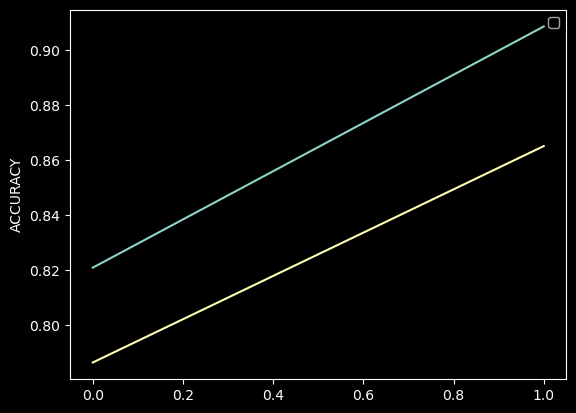

In [162]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel ("ACCURACY")
plt. legend()
plt. show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


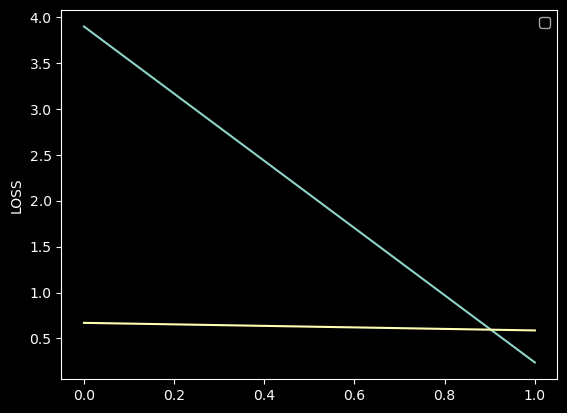

In [163]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel ("LOSS")
plt. legend()
plt. show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


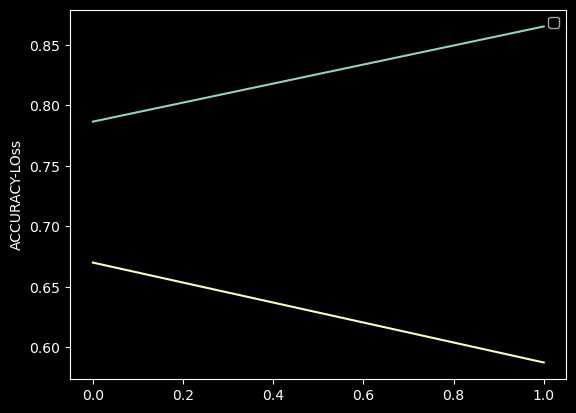

In [164]:
plt.plot(CNN_Model.history["val_accuracy"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel ("ACCURACY-LOss")
plt. legend()
plt. show()

In [50]:
Model_Results = Model.evaluate(Test_IMG_Set)
print ("LOSS:" + "%.4f" % Model_Results[0])
print ("ACCURACY: " + "%.2f" % Model_Results[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9260 - loss: 0.5896
LOSS:0.5695
ACCURACY: 0.94


In [51]:
CNN_S="%.2f" % Model_Results[1]
print (CNN_S)

0.94


In [52]:
Prediction_One=Model.predict(Test_IMG_Set)
Prediction_One=Prediction_One.argmax(axis=-1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 732ms/step


In [53]:
Predict_Class=Model.predict(Test_IMG_Set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


In [157]:
import keras.utils as image
image_path = r"fireimg.jpg"
img = image.load_img(image_path, target_size=(256,256))
x= image.img_to_array (img)
x = np.expand_dims (x,axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Fire


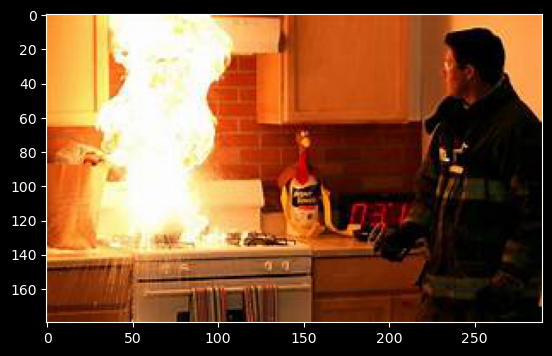

In [158]:
import PIL
Diff_Pred = Model.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
if Diff_Pred == 0:
  print ("Fire")
else:
  print("No_Fire")
image_show=PIL.Image.open(image_path)
plt.imshow(image_show)

<B>ANN MODEL

In [69]:
Model_Two = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),  # Corrected path for the Rescaling layer
  tf.keras.layers.Flatten(input_shape=(256, 256, 3)),  # Assuming the input shape is (256, 256, 3) for RGB images
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense (64, activation='relu'), tf.keras.layers.Dropout (0.2),
# output Layer
  tf.keras. layers.Dense(2,activation="softmax")
])

In [70]:
Model_Two.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [71]:
ANN_Model = Model_Two.fit(Train_IMG_Set,validation_data=Validation_IMG_Set, callbacks=Call_Back,epochs=5)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7461 - loss: 0.5632 - val_accuracy: 0.7978 - val_loss: 0.4349
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8141 - loss: 0.3665 - val_accuracy: 0.8539 - val_loss: 0.3295
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8490 - loss: 0.3358 - val_accuracy: 0.8989 - val_loss: 0.3144
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8760 - loss: 0.2937 - val_accuracy: 0.8764 - val_loss: 0.2898
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9012 - loss: 0.2581 - val_accuracy: 0.9101 - val_loss: 0.2855


In [72]:
print(Model_Two.summary)

<bound method Model.summary of <Sequential name=sequential_1, built=True>>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


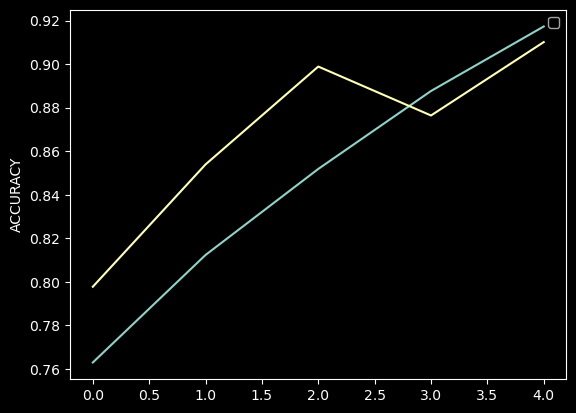

In [165]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel ("ACCURACY")
plt. legend()
plt. show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


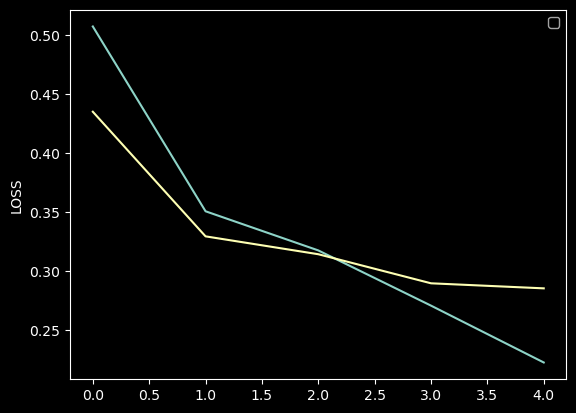

In [166]:
plt.plot(ANN_Model.history["loss"])
plt.plot(ANN_Model.history["val_loss"])
plt.ylabel ("LOSS")
plt. legend()
plt. show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


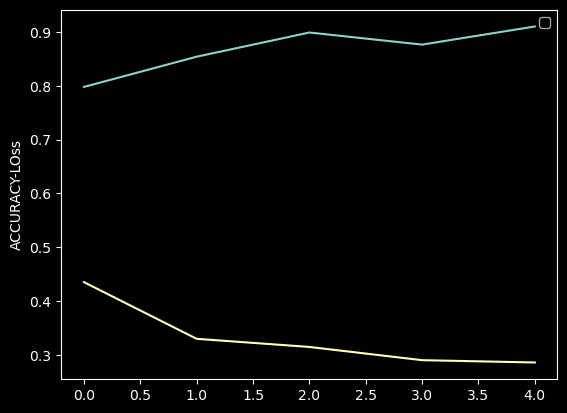

In [167]:
plt.plot(ANN_Model.history["val_accuracy"])
plt.plot(ANN_Model.history["val_loss"])
plt.ylabel ("ACCURACY-LOss")
plt. legend()
plt. show()

In [73]:
Model_Results2 = Model_Two.evaluate(Test_IMG_Set)
print ("LOSS:" + "%.4f" % Model_Results2[0])
print ("ACCURACY: " + "%.2f" % Model_Results2[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.9632 - loss: 0.0963
LOSS:0.1187
ACCURACY: 0.96


In [74]:
Prediction_2=Model_Two.predict(Test_IMG_Set)
Prediction_2=Prediction_2.argmax(axis=-1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 561ms/step


In [75]:
Prediction_Class2=Model_Two.predict(Test_IMG_Set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step


In [159]:
import keras.utils as image
image_path = r"fireimg.jpg"
img = image.load_img(image_path, target_size=(256,256))
x= image.img_to_array (img)
x = np.expand_dims (x,axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Fire


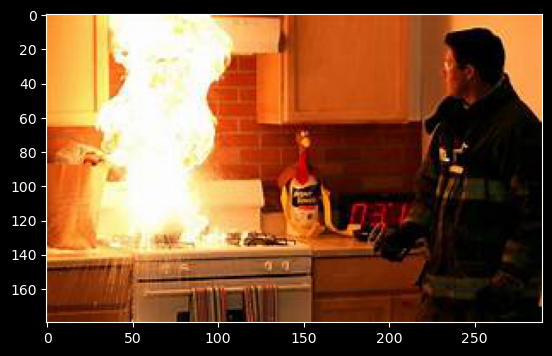

In [160]:
import PIL
Diff_Pred = Model_Two.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
if Diff_Pred == 0:
  print ("Fire")
else:
  print("No_Fire")
image_show=PIL.Image.open(image_path)
plt.imshow(image_show)

<B>CNN_RCNN


In [87]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, TimeDistributed, Flatten, Dense, Dropout, BatchNormalization, LSTM, GRU, Bidirectional


In [88]:
Model_Three=Sequential()
Model_Three.add(Conv2D(12,(3,3),activation='relu',input_shape=(256,256,3)))
Model_Three.add(BatchNormalization())
Model_Three.add(MaxPooling2D(2,2))
Model_Three.add(Conv2D(24,(3,3),activation='relu'))
Model_Three.add(Dropout(0.2))
Model_Three.add(MaxPooling2D(2,2))
Model_Three.add(TimeDistributed(Flatten()))
Model_Three.add(Bidirectional(LSTM(32,return_sequences=True,dropout=0.5,recurrent_dropout=0.5)))
Model_Three.add(Bidirectional(GRU(32,return_sequences=True,dropout=0.5,recurrent_dropout=0.5)))
Model_Three.add(Flatten())
Model_Three.add(Dense(256,activation='relu'))
Model_Three.add(Dropout(0.5))
Model_Three.add(Dense(2,activation='softmax'))

In [89]:
Model_Three.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [90]:
RCNN_Model = Model_Three.fit(Train_IMG_Set,validation_data=Validation_IMG_Set, callbacks=Call_Back,epochs=2)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.6362 - loss: 2895561455828992.0000 - val_accuracy: 0.6854 - val_loss: 0.6779
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6665 - loss: 342010661699584.0000 - val_accuracy: 0.6966 - val_loss: 0.5474


In [91]:
print(Model_Three.summary)

<bound method Model.summary of <Sequential name=sequential_3, built=True>>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


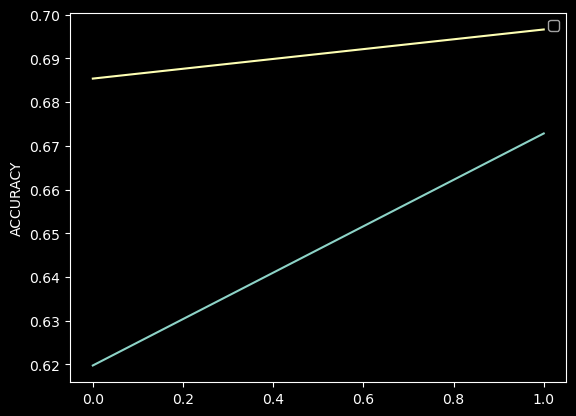

In [169]:
plt.plot(RCNN_Model.history["accuracy"])
plt.plot(RCNN_Model.history["val_accuracy"])
plt.ylabel ("ACCURACY")
plt. legend()
plt. show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


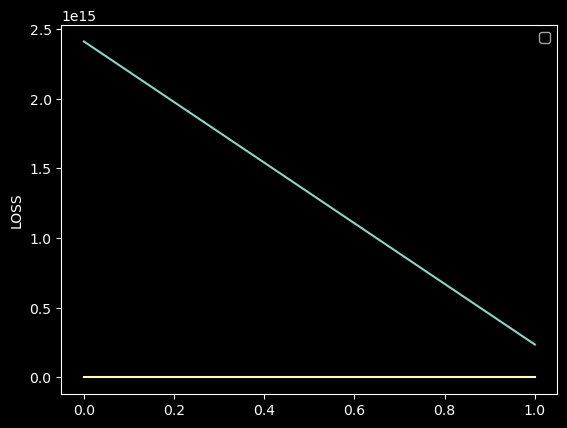

In [170]:
plt.plot(RCNN_Model.history["loss"])
plt.plot(RCNN_Model.history["val_loss"])
plt.ylabel ("LOSS")
plt. legend()
plt. show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


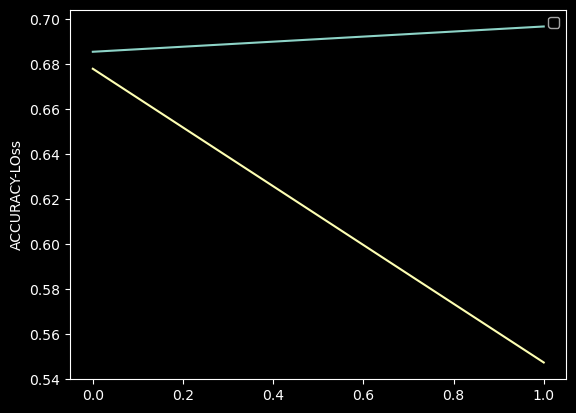

In [168]:
plt.plot(RCNN_Model.history["val_accuracy"])
plt.plot(RCNN_Model.history["val_loss"])
plt.ylabel ("ACCURACY-LOss")
plt. legend()
plt. show()

In [92]:
Model_Results3 = Model_Three.evaluate(Test_IMG_Set)
print ("LOSS:" + "%.4f" % Model_Results3[0])
print ("ACCURACY: " + "%.2f" % Model_Results3[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 930ms/step - accuracy: 0.7622 - loss: 0.4871
LOSS:0.4755
ACCURACY: 0.77


In [93]:
Prediction_3=Model_Three.predict(Test_IMG_Set)
Prediction_3=Prediction_3.argmax(axis=-1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 681ms/step


In [94]:
Prediction_Class3=Model_Three.predict(Test_IMG_Set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step


In [155]:
import keras.utils as image
image_path = r"IMG4.jpg"
img = image.load_img(image_path, target_size=(256,256))
x= image.img_to_array (img)
x = np.expand_dims (x,axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
No_Fire


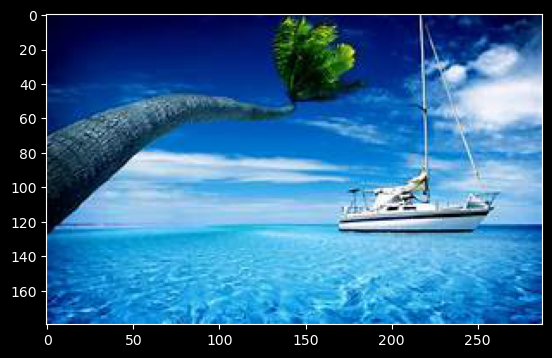

In [156]:
import PIL
Diff_Pred = Model_Three.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
if Diff_Pred == 0:
  print ("Fire")
else:
  print("No_Fire")
image_show=PIL.Image.open(image_path)
plt.imshow(image_show)

<B>COMAPRING THE ALGORITHMS

In [107]:
Scores=[Model_Results[1],Model_Results2[1],Model_Results3[1]]

In [115]:
Models=['CNN','ANN','CNN_RCNN']
for i in range(len(algorithms)):
    print("the accuracy of "+ Models[i]+ ' is '+str(Scores[i])+"%")

the accuracy of CNN is 0.9399999976158142%
the accuracy of ANN is 0.9599999785423279%
the accuracy of CNN_RCNN is 0.7699999809265137%


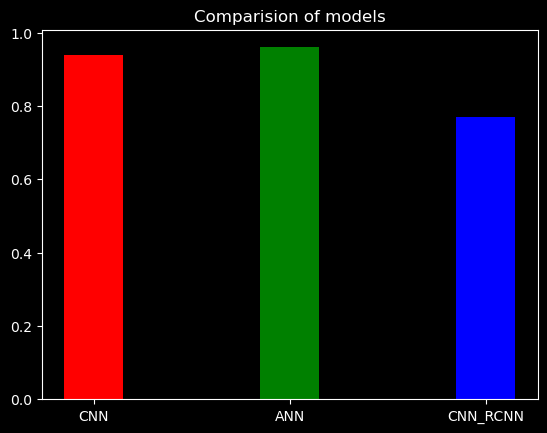

In [119]:
import matplotlib.pyplot as plt
left=[1,2,3]
height=Scores
label=Models
plt.bar(left,height,tick_label=label,width=0.3,color=['red','green','blue'])
plt.title("Comparision of models")
plt.show()